In [27]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy.signal import find_peaks
import random

In [34]:
#This class of function can be only applied to the EELs data given in the range approximately (0.1-0.2eV) Need to find the location 
#when energy loss=0.1/0.13/0.15 one another and fill those number to the peak in function DnumberP
class Lorent(object):
    def __init__(self, epoches, lr,Num):
        self.epoches=epoches
        self.lr=lr
        self.w1=self.w3=self.w5=self.w7=random. random() * 0.9 + 0.25 
        self.w2=self.w4=self.w6=self.w8=random. random() * 1.2 + 0.25 
        self.Num=Num
    def residuals(self,x_ori,x_new,rang,Num,num):
        if num==1:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num]))
        elif num==2:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num])), sum((x_new[rang[1]-Num:rang[1]+Num]-x_ori[rang[1]-Num:rang[1]+Num]))
        elif num==3:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num])), sum((x_new[rang[1]-Num:rang[1]+Num]-x_ori[rang[1]-Num:rang[1]+Num])), sum((x_new[rang[2]-Num:rang[2]+Num]-x_ori[rang[2]-Num:rang[2]+Num]))
        elif num==3:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num])), sum((x_new[rang[1]-Num:rang[1]+Num]-x_ori[rang[1]-Num:rang[1]+Num])), sum((x_new[rang[2]-Num:rang[2]+Num]-x_ori[rang[2]-Num:rang[2]+Num]),sum((x_new[rang[3]-Num:rang[3]+Num]-x_ori[rang[3]-Num:rang[3]+Num])))
    def D(self,df):
        df=pd.read_table(df)[450:600]
        df.columns=['energyloss','intensity']
        x=df['energyloss'].values
        y=df['intensity'].values
        return x,y
    def L1(self,x_array,amp1,W1,C1,w1,w2):
        W1=W1*w1
        amp1=amp1*w2
        return amp1*W1**2/((x_array-C1)**2+W1**2)
    def L2(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)
    def L3(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4,amp3,W3,C3,w5,w6):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        W3=W3*w5
        amp3=amp3*w6
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)+amp3*W3**2/((x_array-C3)**2+W3**2)
    def L4(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4,amp3,W3,C3,w5,w6,amp4,W4,C4,w7,w8):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        W3=W3*w5
        amp3=amp3*w6
        W4=W4*w7
        amp4=amp4*w8
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)+amp3*W3**2/((x_array-C4)**2+W4**2)+amp3*W4**2/((x_array-C3)**2+W4**2)
    
    def DnumberP(self,df):
        threshold=8.5e-4
        accuracy=7e-5
        x,y=self.D(df)
        peaks,_=find_peaks(y,distance=8)
        To=0
        Nps=[]
        peak1=33
        peak2=85
        peak3=97
        peak4=50
        for peak in peaks:
            if peak>peak1-5 and peak<peak1+5:
                if y[peak]-y[peak-5]> threshold or y[peak]-y[peak-6]> threshold or y[peak]-y[peak-4]> threshold:
                    To+=1
                    Nps.append(peak)
                    
            elif peak>peak2-5 and peak<peak2+5:
                if y[peak]-y[peak-5]> threshold or y[peak]-y[peak-6]> threshold or y[peak]-y[peak-4]> threshold:
                    To+=1
                    Nps.append(peak)
                    
            elif peak>peak3-5 and peak<peak3+5:
                if y[peak]-y[peak-5]> threshold or y[peak]-y[peak-6]> threshold or y[peak]-y[peak-4]> threshold:
                    To+=1
                    Nps.append(peak)
                    
            elif peak>peak4-5 and peak<peak4+5:
                if y[peak]-y[peak-5]> threshold or y[peak]-y[peak-6]> threshold or y[peak]-y[peak-4]> threshold:
                    To+=1
                    Nps.append(peak)
                    
        width1=x[Nps[0]+self.Num]-x[Nps[0]-self.Num]
        print(Nps)
        if To==1:
            for i in range(self.epoches):
                new=self.L1(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2)
                res1=self.residuals(y,new,Nps,self.Num,1)
                self.w2=self.w1-self.lr*res1
                self.w1=self.w1-self.lr*res1
                if abs(res1)<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.plot(x,y)
                    plt.title(df[6:23])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('The total Residual='+str((abs(res1))))
                    break
        elif To==2:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            for i in range(self.epoches):
                new=self.L2(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4)
                res1,res2=self.residuals(y,new,Nps,self.Num,2)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                if abs(res1)+abs(res2)<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.title(df[6:23])
                    plt.plot(x,y)
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('The total Residual='+str((abs(res1)+abs(res2))))
                    break
        elif To==3:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            width3=x[Nps[2]+self.Num]-x[Nps[2]-self.Num]
            for i in range(self.epoches):
                new=self.L3(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4,y[Nps[2]],width3,x[Nps[2]],self.w5,self.w6)
                res1,res2,res3=self.residuals(y,new,Nps,self.Num,3)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                self.w5=self.w5-self.lr*res3
                self.w6=self.w6-self.lr*res3
                if abs(res1)+abs(res2)+abs(res3)<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.plot(x,y)
                    plt.title(df[6:23])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('Weight for FWHW of third peak is:'+str(self.w5))
                    print('Weight for amplitude of third peak is:'+str(self.w6))
                    print('The total Residual='+str((abs(res1)+abs(res2)+abs(res3))))
                    break            
        elif To==4:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            width3=x[Nps[2]+self.Num]-x[Nps[2]-self.Num]
            width4=x[Nps[3]+self.Num]-x[Nps[3]-self.Num]
            for i in range(self.epoches):
                new=self.L4(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4,y[Nps[2]],width3,x[Nps[2]],self.w5,self.w6,y[Nps[3]],width3,x[Nps[3]],self.w7,self.w8)
                res1,res2,res3,res4=self.residuals(y,new,Nps,self.Num,4)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                self.w5=self.w5-self.lr*res3
                self.w6=self.w6-self.lr*res3
                self.w7=self.w7-self.lr*res4
                self.w8=self.w8-self.lr*res4
                if abs(res1)+abs(res2)+abs(res3)+abs(res4)<accuracy:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.plot(x,y)
                    plt.title(df[6:23])

                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('Weight for FWHW of third peak is:'+str(self.w5))
                    print('Weight for amplitude of third peak is:'+str(self.w6))
                    print('Weight for FWHW of fourth peak is:'+str(self.w7))
                    print('Weight for amplitude of fourth peak is:'+str(self.w8))
                    print('The total Residual='+str((abs(res1)+abs(res2)+abs(res3)+abs(res4))))
                    break            

[32, 94]
Weight for FWHW of first peak is:0.890588676054986
Weight for amplitude of first peak is:0.6292334688448952
Weight for FWHW of second peak is:1.1933796172526985
Weight for amplitude of second peak is:0.9320244100426095
The total Residual=6.95363536417238e-05
[33, 54, 96]
Weight for FWHW of first peak is:0.8153181174087434
Weight for amplitude of first peak is:0.5539629101986534
Weight for FWHW of second peak is:0.21825946485884873
Weight for amplitude of second peak is:-0.043095742351240696
Weight for FWHW of third peak is:1.2375263870909265
Weight for amplitude of third peak is:0.9761711798808375
The total Residual=6.979411741935525e-05
[33, 53, 86, 95]
[31]
Weight for FWHW of first peak is:0.8927887680755545
Weight for amplitude of first peak is:0.8927887680755545
The total Residual=6.999012361070395e-05
[31]
Weight for FWHW of first peak is:0.8480901270411499
Weight for amplitude of first peak is:0.8480901270411499
The total Residual=6.983948289787656e-05
[32, 50]
Weight fo

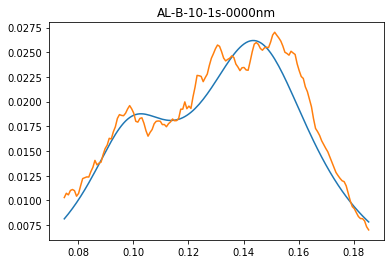

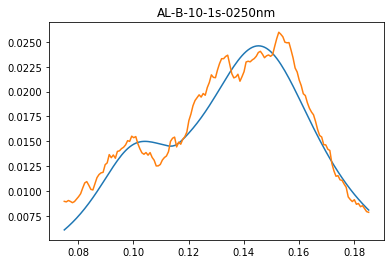

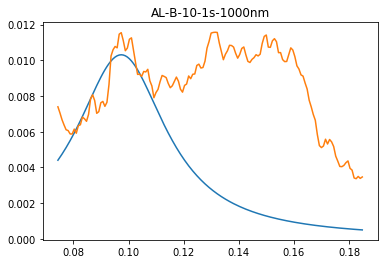

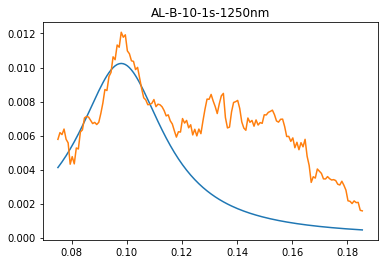

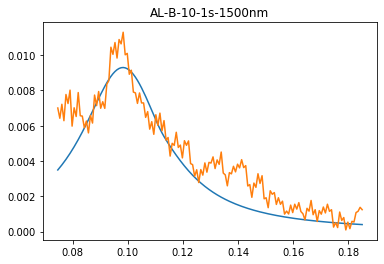

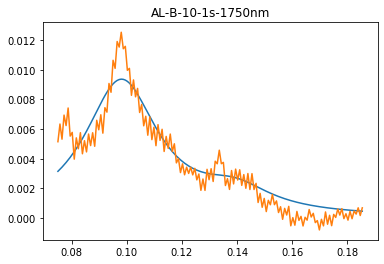

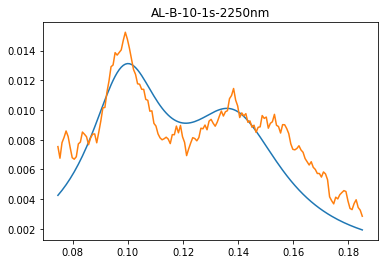

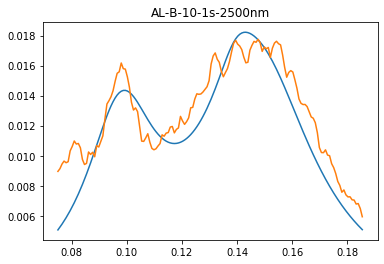

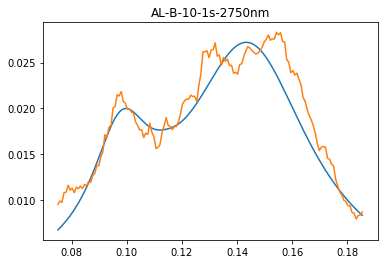

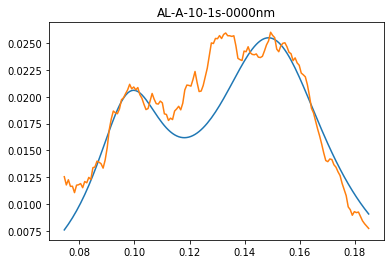

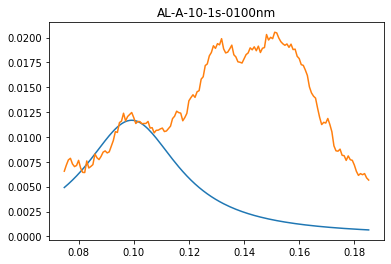

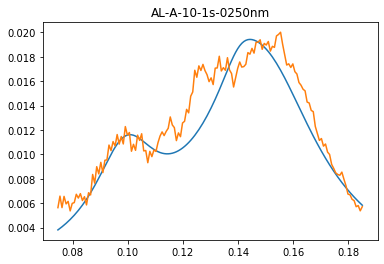

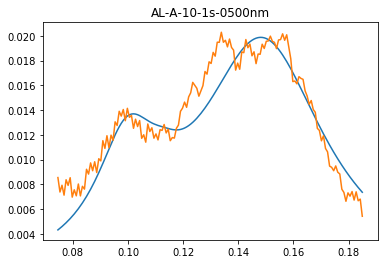

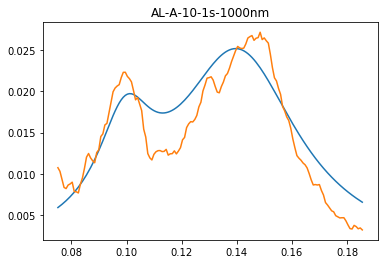

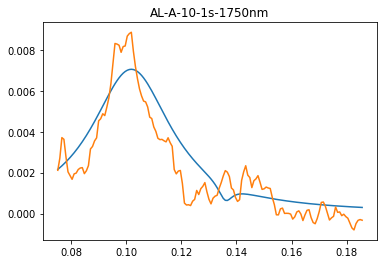

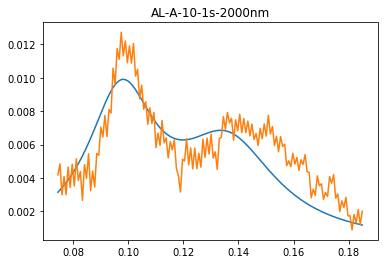

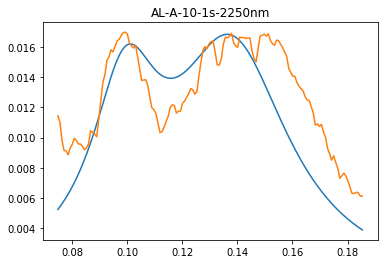

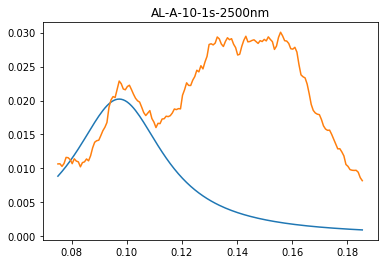

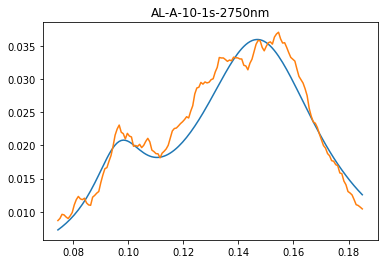

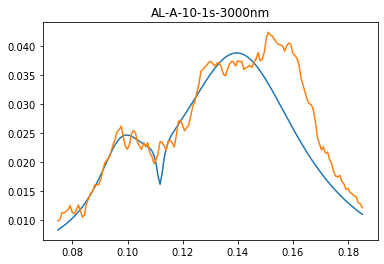

In [35]:
net=Lorent(10000,0.02,15)
number=['0000','0100','0250','0500']
for i in range(1000,3001,250):
    number.append(str(i))
'''number.append('3050')
number.append('3100')'''
for k in ['AL-B','AL-A']:
    for j in number:
        try:
            name='3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j)
            net.DnumberP(name)
        except Exception as e:
            pass